# Tutorial for the HN module of HavNegpy package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import HavNegpy as dd
%matplotlib qt
os.chdir(r'M:\Marshall_Data\mohamed_data\mohamed_data\n44')

In [2]:
def create_dataframe(f):
        col_names = ['Freq', 'T', 'Eps1', 'Eps2']
        #f = input(str("Enter the filename:"))
        df = pd.read_csv(f, sep=r"\s+",index_col=False,usecols = [0,1,2,3],names=col_names,header=None,skiprows=4,encoding='unicode_escape',engine='python')
        col1 = ['log f']    
        for start in range(0, len(df), 63):
           name = df['T'][start]
           #print(name)
           col1.append(name)
        df2 = pd.DataFrame()   
        f1 = df['Freq'][0:63].values
        x1 = np.log10((f1))
        e = pd.DataFrame(x1)
        df2['log f'] = pd.concat([e],axis=1,ignore_index=True)
        global Cooling,Heating
        for start in range(0, len(df), 63):
        
            
            f = df['Eps2'][start:start+63].values
            ep = np.log10(f)
            d = pd.DataFrame(ep)
         
           
            
            df2[start] = pd.concat([d],axis=1,ignore_index=True)
            
        df2.columns = col1
        '''
        a = int(len(col1)/3)
        b = 2*a
        c = int(len(col1)) - b
    
        Heating1 = df2.iloc[8:,0:a+1]
        Cooling = df2.iloc[8:,a+1:b+1]
        Heating2 = df2.iloc[8:,b+1:]
        
        heat1_col = col1[0:a+1]
        cool_col = col1[a+1:b+1]
        heat2_col = col1[b+1:]
        Cooling.columns = cool_col
        Heating1.columns = heat1_col
        Heating2.columns = heat2_col
        
        f2 = df['Freq'][8:59].values
        x2 = np.log10((f2))
        
        Cooling['Freq'] = x2
        Heating1['Freq'] = x2
        Heating2['Freq'] = x2
        '''   
        Cooling = df2.iloc[:,0:25]
        Heating = df2.iloc[:,25:]
        return df,df2,Cooling,Heating #Heating2

In [10]:
df,df2,cool,heat = create_dataframe('EPS.TXT')

In [11]:
x,y = df2['log f'][9:], heat[40][9:]

In [16]:
plt.figure()
plt.scatter(x,y,label='data for fitting')
plt.xlabel('log f [Hz]')
plt.ylabel('log $\epsilon$"')
plt.legend()
plt.title('Example for HN fitting')

Text(0.5, 1.0, 'Example for HN fitting')

image of the plot we are using in this tutorial
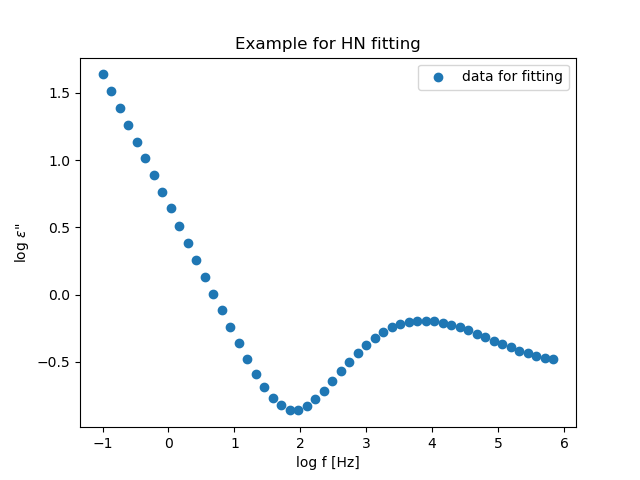


In [17]:
''' instantiate the HN module from HavgNegpy'''
hn = dd.HN()

In [21]:
''' select range to perform hn fitting'''
''' the select range functions pops in a separate window and allows you two clicks to select the region of interest (ROI)'''
''' In this tutorial, I'll plot the ROI and append as an image in the next cell'''

x1,y1 = hn.select_range(x,y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2.47 4.506
[4.419354255377861, 4.290321818876993, 4.161290121759072, 4.032256025890453, 3.9032256828161698, 3.7741934966314363, 3.6451618110869344, 3.5161293137865632, 3.387096044251562, 3.2580647093021717, 3.1290321534708663, 3.0, 2.8709677707186825, 2.741935143884554, 2.6129035360243327, 2.483871028902048]
[-0.2443240510276534, -0.22529257039572312, -0.21013736995361834, -0.1995214368622129, -0.19437070753700492, -0.1952031468647596, -0.2036491153542296, -0.2196898901497833, -0.24406952771835763, -0.2775281456056566, -0.3200155093339718, -0.3713229983490028, -0.4312258541304883, -0.4980757508187894, -0.5690498167129617, -0.642492038012267]
[(2.500202181392442, -0.6355371196230044), (4.475515699010058, -0.2513736191421395)]
x_lower_limit 2.500202181392442 x_upper_limit 4.475515699010058


In [23]:
''' view the data from select range'''
plt.scatter(x1,y1,label = 'Data for fitting')
plt.xlabel('log f [Hz]')
plt.ylabel('log $\epsilon$"')
plt.legend()
plt.title('ROI selected from HN module')

Text(0.5, 1.0, 'ROI selected from HN module')

image of the ROI from HN module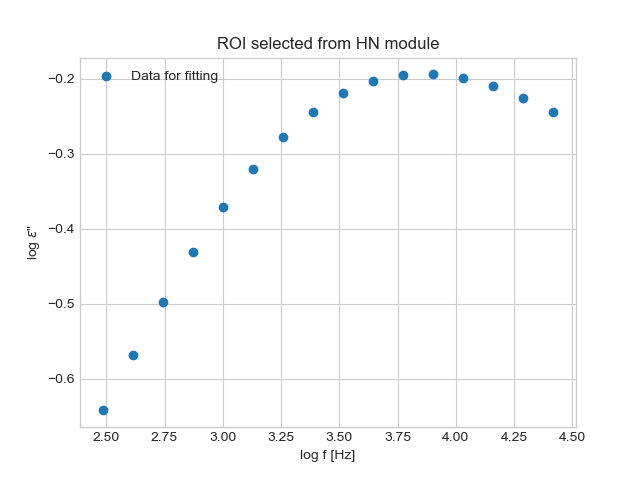

In [24]:
''' dump the initial guess parameters using dump parameters method (varies for each fn), which dumps the parameters in a json file'''
''' this is required before performing the first fitting as it takes the initial guess from the json file created'''
hn.dump_parameters_hn()


enter the beta value:0.5
enter the gamma value:1
enter the fm:3.75
enter the deps:0.5
enter the cond:0
enter the s:1
dumped_parameters {'beta': 0.5, 'gamma': 1.0, 'freq': 5623.413251903491, 'deps': 0.5, 'cond': 0.0, 'n': 1.0}


()

In [25]:
''' view the initial guess for the ROI using initial_view method'''
''' I'll append the image in the next cell'''
hn.initial_view_hn(x1,y1)

loaded parameters 
 {'beta': 0.5, 'gamma': 1.0, 'freq': 5623.413251903491, 'deps': 0.5, 'cond': 0.0, 'n': 1.0}


image of the initial guess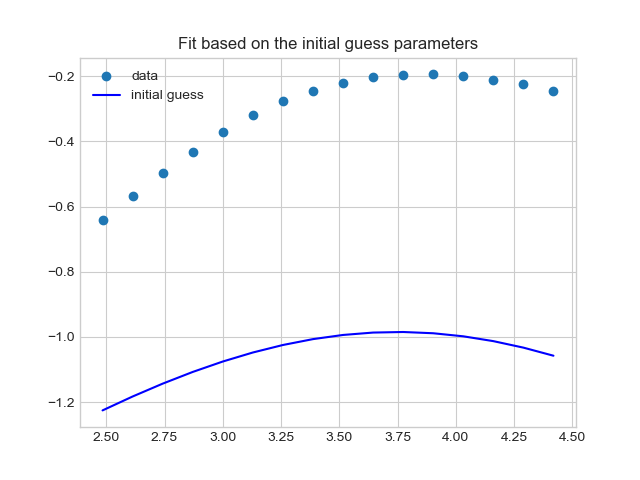

In [26]:
''' pefrorm least squares fitting'''
''' The image of the curve fit is added in the next cell '''
hn.fit(x1,y1)

Choose the fit function
 1 -- HN, 2 -- HN with cond, 3 -- Hn-flank, 4 -- double HN, 5 -- double HN with cond:1
0.7273425866263455 0.35735677206483585 2006.9130813366762 3.225343019206658
log fmax: 3.8537356017041864
fit parameters dumped for next iteration {'beta': 0.7273425866263455, 'gamma': 0.35735677206483585, 'freq': 2006.9130813366762, 'deps': 3.225343019206658, 'cond': 0, 'n': 0}


Example of the fit performed using single HN function
the procedure is similar for double HN and HN with conductivity
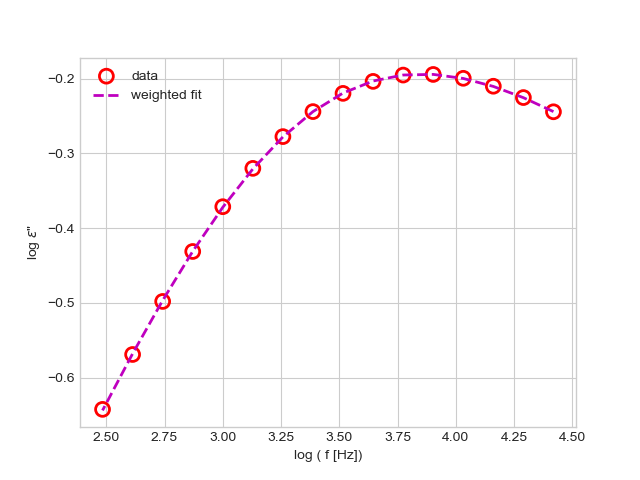

In [27]:
'''create a file to save fit results using create_analysis file method'''
''' before saving fit results an analysis file has to be created '''
hn.create_analysis_file()

Do you want to use an existing file to save fit results? 
 eg: existing file to save HN parameters, y or n:n
Choose the fit function
 1 -- HN, 2 -- HN with cond, 3 -- HN-flank, 4 -- double HN, 5 -- double HN with cond:1
Enter the analysis_file_name:hn_fit.TXT
file did not exist, created hn_fit.TXT


()

In [29]:
''' save the fit results using save_fit method of the corresponding fit function'''
''' takes one argument, read more on the documentation'''
hn.save_fit_hn(1)

()